<a href="https://colab.research.google.com/github/jeriko13/skripsi/blob/main/Suhu_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

from google.colab import files

# Mengupload file dari lokal ke Colab
uploaded = files.upload()

# Memindahkan file yang telah diupload ke direktori Colab
for filename in uploaded.keys():
  !mv "{filename}" /content/


In [19]:
# read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("df_rainfall.csv" ,na_values=0,header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])
#df
# Memilih hanya 50 baris data pertama
df_50 = df.iloc[:50]

# Menampilkan 50 baris data pertama

df.head(50)

,Date,dewpoint,temperature,rainfall
0,01/01/2017,"297,691","303,931","0,01"
1,02/01/2017,"297,72","303,498","0,012"
2,03/01/2017,"297,736","302,315","0,02"
3,04/01/2017,"297,772","302,133","0,016"
4,05/01/2017,"297,78","302,281","0,014"
5,06/01/2017,"297,758","302,529","0,002"
6,07/01/2017,"297,504","303,647","0,003"
7,08/01/2017,"297,401","303,459","0,003"
8,09/01/2017,"297,697","301,818","0,018"
9,10/01/2017,"297,777","302,498","0,012"


In [20]:
#menampilkan daftar kolom pada DataFrame.
df.columns

Index(['Date', 'dewpoint', 'temperature', 'rainfall'], dtype='object')

In [21]:
#Untuk menghapus baris yang memiliki nilai NaN di semua kolom
df.dropna(how='all', inplace=True)


In [22]:
#mengetahui jumlah baris data menampilkan baris terakhir dari DataFrame atau Series.
df.tail

<bound method NDFrame.tail of           Date dewpoint temperature rainfall
0   01/01/2017  297,691     303,931     0,01
1   02/01/2017   297,72     303,498    0,012
2   03/01/2017  297,736     302,315     0,02
3   04/01/2017  297,772     302,133    0,016
4   05/01/2017   297,78     302,281    0,014
5   06/01/2017  297,758     302,529    0,002
6   07/01/2017  297,504     303,647    0,003
7   08/01/2017  297,401     303,459    0,003
8   09/01/2017  297,697     301,818    0,018
9   10/01/2017  297,777     302,498    0,012
10  11/01/2017  297,851     302,931    0,005
11  12/01/2017  297,885      303,57     0,02
12  13/01/2017  297,665     302,621    0,004
13  14/01/2017  297,003     301,931    0,021
14  15/01/2017  297,069     302,465    0,001
15  16/01/2017  297,258     302,138    0,008
16  17/01/2017  297,159     302,415    0,006
17  18/01/2017  297,181     302,668    0,006
18  19/01/2017  297,275     303,205    0,012
19  20/01/2017  297,228     303,056    0,007
20  21/01/2017  297,389  

In [23]:
#mengubah , menjadi .
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

In [24]:

#mengubah tipe data ke numerik
pd.to_numeric(df['dewpoint'], errors='coerce')
pd.to_numeric(df['temperature'], errors='coerce')
pd.to_numeric(df['rainfall'], errors='coerce')


0     0.010
1     0.012
2     0.020
3     0.016
4     0.014
5     0.002
6     0.003
7     0.003
8     0.018
9     0.012
10    0.005
11    0.020
12    0.004
13    0.021
14    0.001
15    0.008
16    0.006
17    0.006
18    0.012
19    0.007
20    0.012
21    0.018
22    0.011
23    0.015
24    0.012
25    0.002
26    0.007
27    0.006
28    0.012
29    0.002
30    0.010
31    0.016
32    0.005
33    0.006
34    0.014
35    0.002
36    0.005
37    0.006
38    0.007
39    0.015
40    0.018
41    0.015
42    0.004
43    0.032
44    0.015
45    0.015
46    0.004
47    0.009
48    0.004
49    0.011
50    0.006
Name: rainfall, dtype: float64

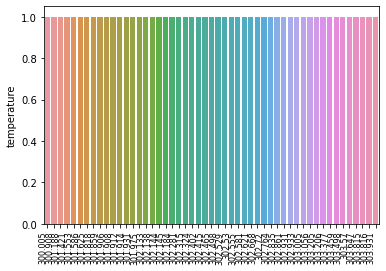

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# mengambil data Suhu yang tidak kosong
df_clean = df.dropna(subset=['temperature'])

# membuat plot bar
ax = sns.barplot(x=df_clean["temperature"].value_counts().index, y=df_clean["temperature"].value_counts())

# menambahkan jarak antara label pada sumbu x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)

# menampilkan plot
plt.show()


In [26]:

#untuk mengecek tipe data
print(df['Date'].dtype)
print(df['dewpoint'].dtype)
print(df['temperature'].dtype)
print(df['rainfall'].dtype)


object
float64
float64
float64


In [27]:

#Code tersebut melakukan konversi kolom dalam dataframe (df) menjadi tipe data numerik 
df['dewpoint'] = pd.to_numeric(df['dewpoint'], errors='coerce')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['rainfall'] = pd.to_numeric(df['rainfall'], errors='coerce')
     

 # Melakukan Prediksi Menggunakan Metode SVR Kernel RBF

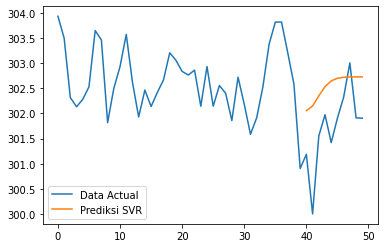

MAE:  0.8691718688608375
MAPE:  0.2884526977636649
MSE:  0.9989667790848579
RMSE:  0.9994832560302638
Hasil Prediksi SVR:  [302.05580579 302.14809051 302.34970615 302.5325535  302.64616203
 302.69949211 302.71910062 302.72484457 302.72619747 302.72645509]
Upper Bound:  [302.74345027 302.83573499 303.03735063 303.22019798 303.33380651
 303.38713659 303.4067451  303.41248905 303.41384195 303.41409957]
Lower Bound:  [301.36816131 301.46044603 301.66206167 301.84490902 301.95851755
 302.01184763 302.03145614 302.03720009 302.03855299 302.03881061]


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['temperature'].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)

# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))

# Menampilkan data actual dan hasil prediksi
plt.plot(data, label='Data Actual')
plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
plt.legend()
plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mae = np.mean(np.abs(test_data - prediksi))
mape = np.mean(np.abs((test_data - prediksi) / test_data)) * 100
mse = mean_squared_error(test_data, prediksi)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print("MAE: ", mae)
print("MAPE: ", mape)
print("MSE: ", mse)
print("RMSE: ", rmse)

# Mencari Upper Bound (UB) dan Lower Bound (LB)
n = len(test_data)
s = np.sqrt(np.sum((test_data - prediksi) ** 2) / (n - 1))
t = 2.064 # tabel distribusi t untuk derajat kebebasan n-2 dan α/2=0.025
ub = prediksi + t * s / np.sqrt(n)
lb = prediksi - t * s / np.sqrt(n)

# Menampilkan UB dan LB
print("Hasil Prediksi SVR: ", prediksi)
print("Upper Bound: ", ub)
print("Lower Bound: ", lb)


# Dibawah ini, semua nilainya dibulatkan , dari hasil prediksi sampai evaluasi

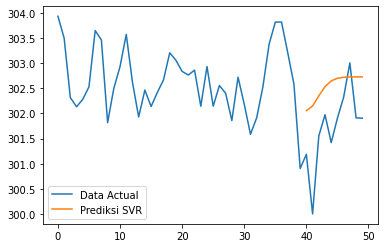

Hasil Evaluasi:
MAE: 0.87
MAPE: 0.29%
MSE: 1.00
RMSE: 1.00

Hasil Prediksi:
Data ke-1: 302.06 (UB: 302.74, LB: 301.37)
Data ke-2: 302.15 (UB: 302.84, LB: 301.46)
Data ke-3: 302.35 (UB: 303.04, LB: 301.66)
Data ke-4: 302.53 (UB: 303.22, LB: 301.84)
Data ke-5: 302.65 (UB: 303.33, LB: 301.96)
Data ke-6: 302.70 (UB: 303.39, LB: 302.01)
Data ke-7: 302.72 (UB: 303.41, LB: 302.03)
Data ke-8: 302.72 (UB: 303.41, LB: 302.04)
Data ke-9: 302.73 (UB: 303.41, LB: 302.04)
Data ke-10: 302.73 (UB: 303.41, LB: 302.04)


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
# Mengambil 50 data pertama
data = df['temperature'].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)
# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))
# Menampilkan data actual dan hasil prediksi
plt.plot(data, label='Data Actual')
plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
plt.legend()
plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mae = np.mean(np.abs(test_data - prediksi))
mape = np.mean(np.abs((test_data - prediksi) / test_data)) * 100
mse = mean_squared_error(test_data, prediksi)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi:")
print("MAE: {:.2f}".format(mae))
print("MAPE: {:.2f}%".format(mape))
print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(np.sqrt(mse)))

# Mencari Upper Bound (UB) dan Lower Bound (LB)
n = len(test_data)
s = np.sqrt(np.sum((test_data - prediksi) ** 2) / (n - 1))
t = 2.064 # tabel distribusi t untuk derajat kebebasan n-2 dan α/2=0.025
ub = prediksi + t * s / np.sqrt(n)
lb = prediksi - t * s / np.sqrt(n)

# Menampilkan hasil prediksi, UB, dan LB
print("\nHasil Prediksi:")
for i in range(len(prediksi)):
    print("Data ke-{}: {:.2f} (UB: {:.2f}, LB: {:.2f})".format(i+1, prediksi[i], ub[i], lb[i]))


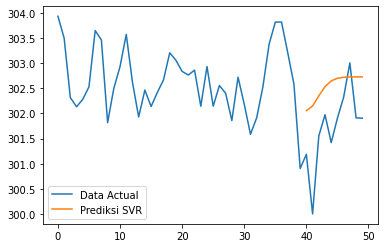

Hasil Prediksi SVR:  [302.05580579 302.14809051 302.34970615 302.5325535  302.64616203
 302.69949211 302.71910062 302.72484457 302.72619747 302.72645509]


In [30]:
# Proses Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))
# Menampilkan data actual dan hasil prediksi
plt.plot(data, label='Data Actual')
plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
plt.legend()
plt.show()
# Menampilkan hasil prediksi
print("Hasil Prediksi SVR: ", prediksi)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
# Mengambil 50 data pertama
data = df['temperature'].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)
# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))
# Menampilkan data actual dan hasil prediksi
#plt.plot(data, label='Data Actual')
#plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
#plt.legend()
#plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mae = np.mean(np.abs(test_data - prediksi))
mape = np.mean(np.abs((test_data - prediksi) / test_data)) * 100
mse = mean_squared_error(test_data, prediksi)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Prediksi Suhu:")
print("MAE: {:.2f}".format(mae))
print("MAPE: {:.2f}%".format(mape))
print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(np.sqrt(mse)))


Hasil Evaluasi Prediksi Suhu:
MAE: 0.87
MAPE: 0.29%
MSE: 1.00
RMSE: 1.00


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df[['dewpoint', 'temperature', 'rainfall']].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)
# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data[:, 1]) # Memilih kolom ke-2 (temperature) sebagai target

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))

# Mencari Upper Bound (UB) dan Lower Bound (LB)
n = len(test_data)
s = np.sqrt(np.sum((test_data[:, 1] - prediksi) ** 2) / (n - 1)) # Memilih kolom ke-2
t = 2.064 # tabel distribusi t untuk derajat kebebasan n-2 dan α/2=0.025
ub = prediksi + t * s / np.sqrt(n)
lb = prediksi - t * s / np.sqrt(n)
# Menampilkan hasil prediksi, UB, dan LB
print("\nHasil Prediksi:")
for i in range(len(prediksi)):
    print("Data ke-{}: Dew Point: {:.2f}, Temperature: {:.2f}, Rainfall: {:.2f} (UB: {:.2f}, LB: {:.2f})".format(i+1, test_data[i, 0], prediksi[i], test_data[i, 2], ub[i], lb[i]))



Hasil Prediksi:
Data ke-1: Dew Point: 297.36, Temperature: 302.06, Rainfall: 0.02 (UB: 302.74, LB: 301.37)
Data ke-2: Dew Point: 297.29, Temperature: 302.15, Rainfall: 0.01 (UB: 302.84, LB: 301.46)
Data ke-3: Dew Point: 297.35, Temperature: 302.35, Rainfall: 0.00 (UB: 303.04, LB: 301.66)
Data ke-4: Dew Point: 297.24, Temperature: 302.53, Rainfall: 0.03 (UB: 303.22, LB: 301.84)
Data ke-5: Dew Point: 297.49, Temperature: 302.65, Rainfall: 0.01 (UB: 303.33, LB: 301.96)
Data ke-6: Dew Point: 297.21, Temperature: 302.70, Rainfall: 0.01 (UB: 303.39, LB: 302.01)
Data ke-7: Dew Point: 296.99, Temperature: 302.72, Rainfall: 0.00 (UB: 303.41, LB: 302.03)
Data ke-8: Dew Point: 297.36, Temperature: 302.72, Rainfall: 0.01 (UB: 303.41, LB: 302.04)
Data ke-9: Dew Point: 297.47, Temperature: 302.73, Rainfall: 0.00 (UB: 303.41, LB: 302.04)
Data ke-10: Dew Point: 297.81, Temperature: 302.73, Rainfall: 0.01 (UB: 303.41, LB: 302.04)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df[['dewpoint', 'temperature', 'rainfall']].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)
# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data[:, 1]) # Memilih kolom ke-2 (temperature) sebagai target

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))

# Mencari Upper Bound (UB) dan Lower Bound (LB)
n = len(test_data)
s = np.sqrt(np.sum((test_data[:, 1] - prediksi) ** 2) / (n - 1)) # Memilih kolom ke-2 (temperature) sebagai target
t = 2.064 # tabel distribusi t untuk derajat kebebasan n-2 dan α/2=0.025
ub = prediksi + t * s / np.sqrt(n)
lb = prediksi - t * s / np.sqrt(n)
# Menampilkan hasil prediksi, UB, dan LB
print("\nHasil Prediksi:")
for i in range(len(prediksi)):
    print("Data ke-{}:\nDew Point: {:.2f}\nTemperature: {:.2f}\nRainfall:{:.2f}\n(UB: {:.2f}, LB: {:.2f})\n".format(i+1, test_data[i, 0], prediksi[i], test_data[i, 2], ub[i], lb[i]))

  



Hasil Prediksi:
Data ke-1:
Dew Point: 297.36
Temperature: 302.06
Rainfall:0.02
(UB: 302.74, LB: 301.37)

Data ke-2:
Dew Point: 297.29
Temperature: 302.15
Rainfall:0.01
(UB: 302.84, LB: 301.46)

Data ke-3:
Dew Point: 297.35
Temperature: 302.35
Rainfall:0.00
(UB: 303.04, LB: 301.66)

Data ke-4:
Dew Point: 297.24
Temperature: 302.53
Rainfall:0.03
(UB: 303.22, LB: 301.84)

Data ke-5:
Dew Point: 297.49
Temperature: 302.65
Rainfall:0.01
(UB: 303.33, LB: 301.96)

Data ke-6:
Dew Point: 297.21
Temperature: 302.70
Rainfall:0.01
(UB: 303.39, LB: 302.01)

Data ke-7:
Dew Point: 296.99
Temperature: 302.72
Rainfall:0.00
(UB: 303.41, LB: 302.03)

Data ke-8:
Dew Point: 297.36
Temperature: 302.72
Rainfall:0.01
(UB: 303.41, LB: 302.04)

Data ke-9:
Dew Point: 297.47
Temperature: 302.73
Rainfall:0.00
(UB: 303.41, LB: 302.04)

Data ke-10:
Dew Point: 297.81
Temperature: 302.73
Rainfall:0.01
(UB: 303.41, LB: 302.04)

